# Overfitting and resolving it

Overfitting

Cross validation- k fold cross validation

Regularisation - LR

    Lasso
    
    Ridge
    
    Elastic Net 

Overfitting:

Phenomenon where training performance is good, but testing performance not good.



## Sourcing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ad=pd.read_csv('Advertising.csv')
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Preprocessing

In [3]:
ad=ad.drop(['Unnamed: 0'],axis=1)
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
# Features

X=ad.drop(['Sales'],axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
# Target

y= ad['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Standardisation of features

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

## Splitting to train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

## Model building - LR

In [8]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

## Model performance

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

r2_train=r2_score(y_train,lr.predict(X_train))
r2_test=r2_score(y_test,lr.predict(X_test))

mse_train=mean_squared_error(y_train,lr.predict(X_train))
mse_test=mean_squared_error(y_test,lr.predict(X_test))

print('R2 score- training:',r2_train)
print('R2 score- testing:',r2_test)

print('MSE- training:',mse_train)
print('MSE- testing:',mse_test)





R2 score- training: 0.9209087553499528
R2 score- testing: 0.8353672324670594
MSE- training: 1.8585966709492503
MSE- testing: 6.700486756528875


### Remark:

There is overfitting

## Resolving overfitting

 ### Cross validation
 
  #### k -fold cross validation

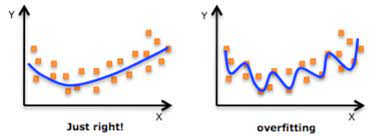

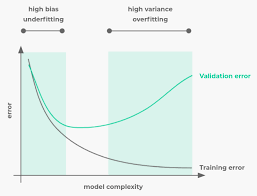

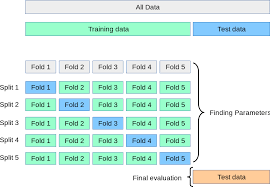

## LR using k fold cross validation

In [10]:
from sklearn.model_selection import cross_val_score,cross_val_predict
lr=LinearRegression()
cv_score=cross_val_score(lr,X_train,y_train,cv=5)
print('CV_Score:',cv_score)

CV_Score: [0.92009437 0.90119987 0.90916145 0.92654738 0.92166077]


In [11]:
print('CV_Score mean:', cv_score.mean())

CV_Score mean: 0.9157327701186169


In [12]:
# cv=4
lr=LinearRegression()
cv_score=cross_val_score(lr,X_train,y_train,cv=4)
print('CV_Score:',cv_score)
print('CV_Score mean:', cv_score.mean())

CV_Score: [0.90318963 0.9030216  0.93983595 0.91827199]
CV_Score mean: 0.9160797935293802


In [13]:
# cv=3
lr=LinearRegression()
cv_score=cross_val_score(lr,X_train,y_train,cv=3)
print('CV_Score:',cv_score)
print('CV_Score mean:', cv_score.mean())

CV_Score: [0.90904216 0.92013056 0.9255209 ]
CV_Score mean: 0.9182312082542176


In [14]:
# cv=10
lr=LinearRegression()
cv_score=cross_val_score(lr,X_train,y_train,cv=10)
print('CV_Score:',cv_score)
print('CV_Score mean:', cv_score.mean())

CV_Score: [0.89460976 0.93950986 0.80333388 0.94414693 0.8591572  0.92865633
 0.93605667 0.91725888 0.89502386 0.94632849]
CV_Score mean: 0.9064081863045436


n= # of the training data

k fold validation

k=1, usual training

k=n, Leave One Out Cross Validation

k=2,3,4,....., K- fold cross validation

# k=3 is the chosen value of cv

y_pred=cross_val_predict(lr, X_test,y_test,cv=3)
y_pred

In [16]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: Sales, dtype: float64

Cross validation is a general tool, which can applied on any ML technique

## Regularisation - LR

Lasso

Ridge

Elastic Net

## Lasso

In [18]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

r2_lasso_train=r2_score(y_train,lasso.predict(X_train))
r2_lasso_test=r2_score(y_test,lasso.predict(X_test))

print(' R2 score: Lasso - Train',r2_lasso_train)
print(' R2 score: Lasso - Test',r2_lasso_test)

mse_lasso_train=mean_squared_error(y_train,lasso.predict(X_train))
mse_lasso_test=mean_squared_error(y_test,lasso.predict(X_test))

print(' MSE: Lasso - Train',mse_lasso_train)
print(' MSE: Lasso - Test',mse_lasso_test)

 R2 score: Lasso - Train 0.9199573974585257
 R2 score: Lasso - Test 0.8319851097741227
 MSE: Lasso - Train 1.8809530090965556
 MSE: Lasso - Test 6.8381377761440545


## Ridge

In [19]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9209083458884119
 R2 score: ridge - Test 0.8352944314323737
 MSE: ridge - Train 1.8586062930491445
 MSE: ridge - Test 6.70344972906516


In [20]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9208985792845601
 R2 score: ridge - Test 0.8349974034385317
 MSE: ridge - Train 1.8588358023644376
 MSE: ridge - Test 6.715538647746909


In [21]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.9)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9208759789960037
 R2 score: ridge - Test 0.8346911915204807
 MSE: ridge - Train 1.8593668955500262
 MSE: ridge - Test 6.72800134841299


In [22]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9209087512498633
 R2 score: ridge - Test 0.8353599787786975
 MSE: ridge - Train 1.858596767298888
 MSE: ridge - Test 6.70078197869839


In [23]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9209087553089463
 R2 score: ridge - Test 0.8353665073627965
 MSE: ridge - Train 1.8585966719128755
 MSE: ridge - Test 6.7005162679777985


In [24]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.0)
ridge.fit(X_train,y_train)

r2_ridge_train=r2_score(y_train,ridge.predict(X_train))
r2_ridge_test=r2_score(y_test,ridge.predict(X_test))

print(' R2 score: ridge - Train',r2_ridge_train)
print(' R2 score: ridge - Test',r2_ridge_test)

mse_ridge_train=mean_squared_error(y_train,ridge.predict(X_train))
mse_ridge_test=mean_squared_error(y_test,ridge.predict(X_test))

print(' MSE: ridge - Train',mse_ridge_train)
print(' MSE: ridge - Test',mse_ridge_test)

 R2 score: ridge - Train 0.9209087553499528
 R2 score: ridge - Test 0.8353672324670594
 MSE: ridge - Train 1.8585966709492503
 MSE: ridge - Test 6.700486756528873


## Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet

enet=ElasticNet()
enet.fit(X_train,y_train)

r2_enet_train=r2_score(y_train,enet.predict(X_train))
r2_enet_test=r2_score(y_test,enet.predict(X_test))

print(' R2 score: enet - Train',r2_enet_train)
print(' R2 score: enet - Test',r2_enet_test)

mse_enet_train=mean_squared_error(y_train,enet.predict(X_train))
mse_enet_test=mean_squared_error(y_test,enet.predict(X_test))

print(' MSE: enet - Train',mse_enet_train)
print(' MSE: enet - Test',mse_enet_test)

 R2 score: enet - Train 0.7431344504513608
 R2 score: enet - Test 0.643247265959083
 MSE: enet - Train 6.036185893710871
 MSE: enet - Test 14.519691344667118
